# **Predict whether or not they survived the sinking of the Titanic**



1.   Defining the problem
2.   Load the data
3.   Data preparation and Exploratory data analysis (EDA)
4.   Choose an alghoritm
5.   Analysis/Evaluation

# 1. Defining the problem

The goal is to achieve the highest possible accuracy on the test set. 
Based on the available data, it is necessary to predict which people survived the disaster.

# 2. Load the data

Data taken from kaggle.
Data are already divided into training and test set.

Data were loaded using the pandas library.



In [3]:
import pandas as pd
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')


# 3. Data preparation and Exploratory data analysis (EDA)

First, we'll see what the data looks like.
We'll see first 10 rows.

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


or we can see last 10 rows

In [5]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


After first looks at the data, it was concluded:


*   Structured data: appears in tabulated format (rows and columns style )
*   It contains different types of data ( Nominal/categorical – One thing or another, Numerical: Any continuous value where the difference between them matters, Ordinal: Data which has order but the distance between values is unknown ).

The meanings of individual columns are as follows: 


*   survival - 0 = No, 1 = Yes
*   pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
*   Age in years
*   sibsp - # of siblings / spouses aboard the Titanic
*   parch - # of parents / children aboard the Titanic
*   Ticket number
*   Sex
*   Passenger fare
*   Cabin number
*   embarked - Port of Embarkation  C = Cherbourg, Q = Queenstown, S = Southampton

After those conclusion we can see what shape of this data is:


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

We can see that test data have one column less than train data. That is because, test data are used to evaluate the model made.
In test data we have no column survived, which tells us whether a person has survived a disaster.

We can get some data information with just one line of code

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The info() method prints information about the DataFrame.
The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
We can se that this dataset have 891 entries and 12 columns ( 11 is features and 1 is target variable ).
We can see that *Age*, *Cabin* and *Embarked* have missing values. We will see how to deal with missing data.

There is another useful function that shows the exact number of missing values

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see Cabin feature has many missing values.

To better understand data, we can use describe python function:


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile.
50% - The 50% percentile.
75% - The 75% percentile.
max - the maximum value.

Percentile meaning: how many of the values are less than the given percentile. We can choose different percentile if is necessary.

Now, we can start with cleaning data.

In [11]:
train = train.drop(["Name", "Ticket", "Cabin"],axis=1)
test = test.drop(["Name", "Ticket", "Cabin"],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


three columns have been dropped because they have no bearing on the conclusion of whether they will survive the disaster.

we will now turn all the features into numbers

In [12]:
train = pd.get_dummies(train,columns=['Sex','Embarked'])
test = pd.get_dummies(test,columns=['Sex','Embarked'])

The get_dummies() function is used to convert categorical variable into dummy/indicator variables. Data of which to get dummy indicators. String to append DataFrame column names.

In [13]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


As we see, there are no more categorical variables.
A machine learning model requires all values to be numerical.

The next thing we need to do is drop the duplicate.


In [14]:
train = train.drop_duplicates()
test = test.drop_duplicates()
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    uint8  
 8   Sex_male     891 non-null    uint8  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 60.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass    

The number of entries is the same as before we applied the drop_duplicate function, so there were no duplicates in our data.

We will now address the missing values:

In [15]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns

# split data
trainn = train.loc[(train.Age.notnull())]  # known age values
testt = train.loc[(train.Age.isnull())]  # all nan age values

# select age column
y = trainn.values[:, 3]

# select pclass and SibSp
X = trainn.values[:, [2, 4]]

# create RandomForestRegressor model
rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)

# Fit a model
rfr.fit(X, y)

# Use the fitted model to predict the missing values
predictedAges = rfr.predict(testt.values[:, [2, 4]])

# create predicted age column
train['pred_age'] = train.Age

# fill column
train.loc[(train.pred_age.isnull()), 'pred_age'] = predictedAges 


In [16]:
# split data
trainnn = test.loc[(test.Age.notnull())]  # known age values
testtt = test.loc[(test.Age.isnull())]  # all nan age values

# select age column
y = trainnn.values[:, 2]

# select pclass and SibSp
X = trainnn.values[:, [1, 3]]

# create RandomForestRegressor model
rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)

# Fit a model
rfr.fit(X, y)

# Use the fitted model to predict the missing values
predictedAges = rfr.predict(testtt.values[:, [1, 3]])

# create predicted age column
test['pred_age'] = test.Age

# fill column
test.loc[(test.pred_age.isnull()), 'pred_age'] = predictedAges 


In this way, we filled in the missing values ​​with help RandomForestRegressor model.
Only two features were used to estimate the age of the passengers in this case - pclass and SibSp.

In [17]:
train.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
 10  pred_age    891 non-null    float64
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.1 KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Sex_female  418 non-null    uint8  
 5   Sex_male    418 non-null    uint8  
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
 9   pred_age    418 non-null    float64
dtypes: float64(2), int64(3), uint8(5)
memory usage: 21.6 KB


There is no missing values anymore!

Now, we can see some visualizations:

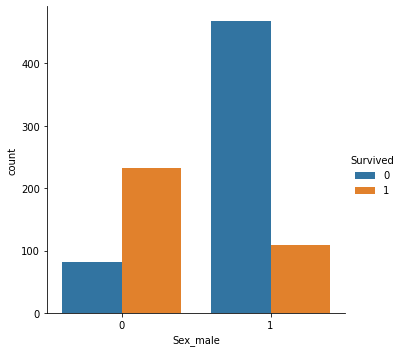

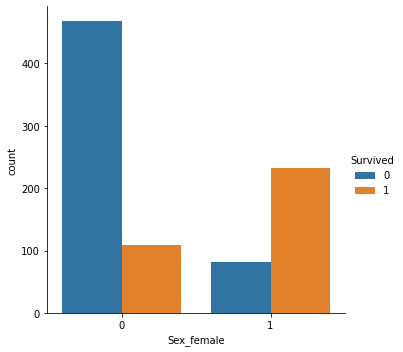

In [20]:
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Sex_male", hue ="Survived",
kind ="count", data = train)

sns.catplot(x ="Sex_female", hue ="Survived",
kind ="count", data = train)

Based on these two graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

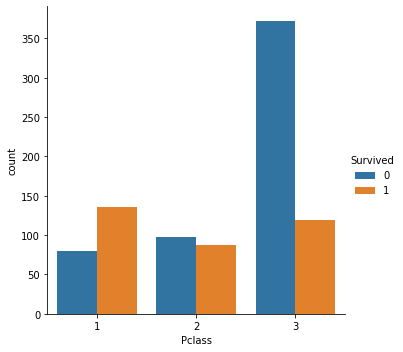

In [21]:
# Countplot
sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = train)

Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate. Like we expected!
Class played a critical role in survival, as the survival rate decreased drastically for the lowest class.

In [22]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visualization')

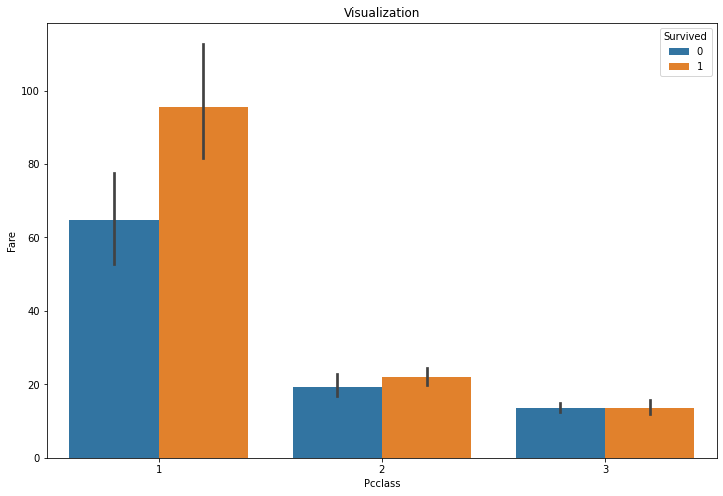

In [23]:
plt.figure(figsize=(12,8))
ax= sns.barplot('Pclass','Fare',hue='Survived',data=train)
plt.xlabel('Pcclass')
plt.ylabel('Fare')
plt.title('Visualization')

This visualization only confirms what we have concluded from the previous graphs.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train.drop('Survived',axis=1)
y = train['Survived']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


Even though standardisation is not needed for all algorithms, it is needed for algorithms like Logistic Regression and K Nearest Neighbours, since they use Euclidean or Manhattan distance. So, we standardise our data first.
I divided the training data into two sets. 80% of data are in X_train dataset and another 20% we will use to test our model.

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(gamma='auto')
model.fit(X_train,y_train)
yhat = model.predict(X_test)
print(accuracy_score(y_test,yhat))

0.7318435754189944


For this classification task, the Suport Vector Machine model was used. Accuracy on the test set is 0.7318435754189944. 
Regularization parameter C was on default value 1.0 that means-without regularization. The kernel type used in the algorithm was ‘rbf’. Kernel coefficient for ‘rbf’ gamma was on 'auto'.

Next model that we will use is the KNN model.
First thing that we need to do is to choose best n_neighbort parameter because accuracy depend a lot of this parameter.
To choose this parameter, we will try some values and then pich the one which give best accuracy.

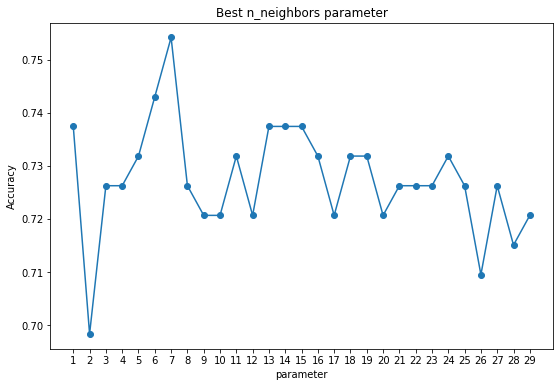

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train,y_train)
    yhat = model.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    
plt.figure(figsize=(9,6))
plt.plot(range(1,30),acc, marker = "o")
plt.xlabel("parameter")
plt.ylabel("Accuracy")
plt.title("Best n_neighbors parameter")
plt.xticks(range(1,30))
plt.show()

We choose n_neighbors=7

In [41]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train,y_train)
yhat = model.predict(X_test)
accuracy_score(y_test,yhat)
print("accuracy score for n_neighbors = 7 is ", accuracy_score(y_test,yhat))

accuracy score for n_neighbors = 7 is  0.7541899441340782


Next model we wil try is RandomForest Classifier.

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
yhat = model.predict(X_test)
print("Accuracy is : ",accuracy_score(y_test,yhat))

Accuracy is :  0.8268156424581006


In this case, the last model had the highest accuracy.